In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from scipy import stats, signal
from scipy.fftpack import fft, fftfreq

In [195]:
d = {'Name': ['Lemon', 'Steph', 'Nim'], 'Age': [0, 21, 22], 'Height': [0, 165, 163], 'Gender': ['M', 'F', 'F']}
dataframe = pd.DataFrame(data=d)
print(dataframe)

    Name  Age  Height Gender
0  Lemon    0       0      M
1  Steph   21     165      F
2    Nim   22     163      F


In [192]:
data_1 = pd.read_csv("sensor-Lemon.csv")
data_2 = pd.read_csv("sensor-Steph.csv")
data_3 = pd.read_csv("sensor-Nim.csv")


In [183]:
# remove when person was not walking

# participant 1
data_1 = data_l.rename(columns={'aT (m/s^2)': 'atotal', 'ax (m/s^2)': 'ax', 'ay (m/s^2)': 'ay', 'az (m/s^2)': 'az'})
data_1 = data_l.iloc[2000:5960]
# participant 2
data_2 = data_s.iloc[610:3075]
# participant 3
data_3 = data_s.iloc[1220:3330]
# participant 4

# participant 5

data = data_3

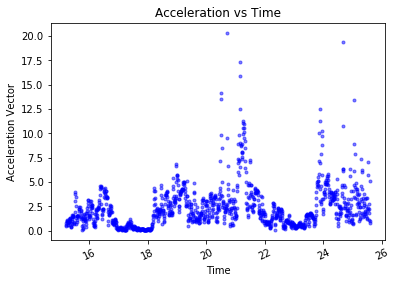

In [184]:
# plot the vector of the total acceleration against time
f =  plt.figure()
plt.xticks(rotation=25)
plt.plot(data['time'], data['atotal'],'b.', alpha=0.5) 
plt.xlabel('Time')
plt.ylabel('Acceleration Vector')
plt.title('Acceleration vs Time')
#plt.legend()
plt.show()
#f.savefig("figure1.png")

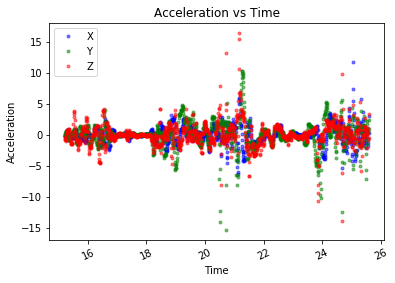

In [185]:
# plot of accelerations in x, y, and z direction
f1 =  plt.figure()
plt.xticks(rotation=25)
plt.plot(data['time'], data['ax'],'b.', alpha=0.5, label="X") 
plt.plot(data['time'], data['ay'],'g.', alpha=0.5, label="Y") 
plt.plot(data['time'], data['az'],'r.', alpha=0.5, label="Z") 
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.title('Acceleration vs Time')
plt.legend()
plt.show()
#f1.savefig("figure1.png")

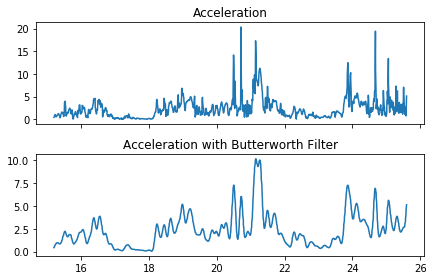

In [186]:
# Low-pass Buttermore filter to get rid of high frequency random noise
b,a = signal.butter(3, 0.1, btype='lowpass', analog=False)
low_pass = signal.filtfilt(b, a, data['atotal'])

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.plot(data['time'], data['atotal'])
ax1.set_title('Acceleration')
#ax1.axis([10, 15, -50, 50])

ax2.plot(data['time'], low_pass)
ax2.set_title('Acceleration with Butterworth Filter')
#ax2.axis([10, 15, -50, 50])

plt.tight_layout()
plt.show()

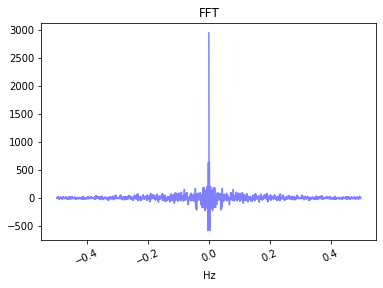

In [205]:
# fourier transform
yf = fft(data['atotal'])
xf = fftfreq(data['time'].shape[0])

f2 =  plt.figure()
plt.xticks(rotation=25)
plt.plot(xf, yf,'b', alpha=0.5) 
plt.xlabel('Hz')
plt.ylabel('')
plt.title('FFT')
#plt.legend()
plt.show()

#f2.savefig("figure1.png")

In [206]:
# find the peak frequency
# referenced: https://stackoverflow.com/questions/37049887/print-highest-peak-value-of-the-frequency-domain-plot
yf_mag = np.abs(yf) # find magnitude
max_y = np.max(yf_mag) # find max peak
loc_y = np.argmax(yf_mag) # find its location
freq_y = xf[loc_y] # get the actual frequency value
print('Peak: ', freq_y)

# peak frequency is 0 so try removing it and finding next highest peak
yf_no_max_peak = np.delete(yf, np.where(yf == max_y))
xf_no_max_peak = np.delete(xf, [loc_y])
yf_mag_2 = np.abs(yf_no_max_peak) # find magnitude
max_y_2 = np.max(yf_mag_2) # find max peak
loc_y_2 = np.argmax(yf_mag_2) # find its location
freq_y_2 = xf_no_max_peak[loc_y_2] # get the actual frequency value
print('Second Peak: ', freq_y_2)

Peak:  0.0
Second Peak:  0.00321285140562249


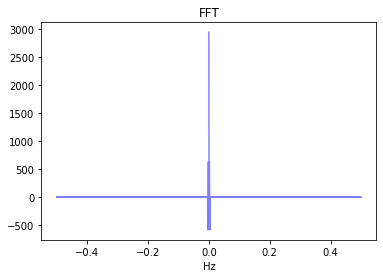

In [207]:
# find multiple peaks
# referenced: https://stackoverflow.com/questions/59940645/how-do-i-get-peak-values-back-from-fourier-transform
threshold = 400
yf[np.abs(yf)<threshold] = 0
plt.plot(xf, yf,'b', alpha=0.5) 
plt.xlabel('Hz')
plt.ylabel('')
plt.title('FFT')
#plt.legend()
plt.show()

In [201]:
dataframe['Step Frequency'] = [0.009090909090909091, 0.003234501347708895, 0.00321285140562249]
dataframe

,Name,Age,Height,Gender,Step Frequency
0,Lemon,0,0,M,0.090909
1,Steph,21,165,F,0.032345
2,Nim,22,163,F,0.032129
